# Exploratory Data Analysis for Lightening Data
## Part of Google Data Analytics Course
The dataset is provided as a part of the course.

In [1]:
# importing libraries
import pandas as pd
import numpy as np 
import datetime as dt 
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv("python_dataset1.csv")

In [3]:
data1.head()

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)


Column header Center Point Geom refers to the longitude and latitude of a particular strike.

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 77.8+ MB


In [5]:
data1.shape

(3401012, 3)

In [6]:
data1['number_of_strikes'].describe()

count    3.401012e+06
mean     1.311403e+01
std      3.212099e+01
min      1.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      1.200000e+01
max      2.211000e+03
Name: number_of_strikes, dtype: float64

In [7]:
data1.sample()

,date,number_of_strikes,center_point_geom
861451,2018-07-19,1,POINT(-123.9 31.3)


In [8]:
data1['date'] = pd.to_datetime(data1['date'])

In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   date               datetime64[ns]
 1   number_of_strikes  int64         
 2   center_point_geom  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 77.8+ MB


In [12]:
data1.isna().sum()

date                 0
number_of_strikes    0
center_point_geom    0
dtype: int64

In [20]:
# Calculate days with most lightning strikes.
data1.groupby(['date']).sum()[['number_of_strikes']].sort_values('number_of_strikes', ascending=False).head(10) 

,number_of_strikes
date,
2018-08-29,1070457
2018-08-17,969774
2018-08-28,917199
2018-08-27,824589
2018-08-30,802170
2018-08-19,786225
2018-08-18,741180
2018-08-16,734475
2018-08-31,723624


In [13]:
data1['month'] = data1['date'].dt.month
data1['month_txt'] = data1['date'].dt.month_name().str.slice(stop=3)

In [21]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 5 columns):
 #   Column             Dtype         
---  ------             -----         
 0   date               datetime64[ns]
 1   number_of_strikes  int64         
 2   center_point_geom  object        
 3   month              int32         
 4   month_txt          object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(2)
memory usage: 116.8+ MB


In [31]:
data1.groupby(['month','month_txt'])[['number_of_strikes']].sum().sort_values('number_of_strikes', ascending=False)

,,number_of_strikes
month,month_txt,
8,Aug,15525255
7,Jul,8320400
6,Jun,6445083
5,May,4166726
9,Sep,3018336
2,Feb,2071315
4,Apr,1524339
10,Oct,1093962
1,Jan,860045


In [27]:
data1_by_month = data1.groupby(['month','month_txt'])[['number_of_strikes']].sum().sort_values('month', ascending=True).reset_index()

In [26]:
data1_by_month

,month,month_txt,number_of_strikes
0,1,Jan,860045
1,2,Feb,2071315
2,3,Mar,854168
3,4,Apr,1524339
4,5,May,4166726
5,6,Jun,6445083
6,7,Jul,8320400
7,8,Aug,15525255
8,9,Sep,3018336
9,10,Oct,1093962


In [29]:
print(pd.__version__)

2.2.2


In [28]:
new = data1
new_by_month = new.groupby(['month','month_txt']).sum().sort_values('month', ascending=True).head(12).reset_index()
new_by_month

TypeError: datetime64 type does not support sum operations

This code above was throwing an error which was part of the original notebook provided in the course. It is basically summing all the columns, numeric or non-numeric including Datetime64[ns]. Unfortunately pandas can not sum non numeric values.

Now one might argue that why does Pandas not ignore non-numeric values automatically? Actually Pandas does. However, it treats datetime columns as numeric-like, which are not purely numeric. They are handled differently because they can be used in operations like difference between dates. That is why Pandas when asked to, will perform sum operation on a datetime column. 

The notebook provided in this course does not throw this error because the pandas version used is 1.3.5, whereas I am suing 2.2.2. This reflects that maybe in order versions Pandas would ignore this automatically, but the way newer versions handle data types, it does not ignore and must be told explicitly. 

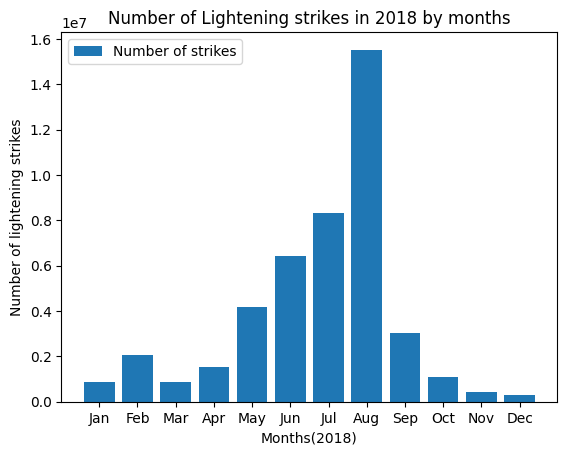

In [30]:
x = data1_by_month['month_txt']
y = data1_by_month['number_of_strikes']

plt.bar(x,y, label = "Number of strikes")
plt.plot()

plt.xlabel("Months(2018)")
plt.ylabel("Number of lightening strikes")
plt.title("Number of Lightening strikes in 2018 by months")
plt.legend()
plt.show()